In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

sns.set_theme()

In [110]:
df = pd.read_csv("data/palo_alto_old_cleaned.csv", low_memory=False)
df.head()

,Unnamed: 0,Plug Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),...,Driver Postal Code,User ID,County,System S/N,Model Number,Station Name,Date,Start Day,Start Month,Start Year
0,0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,...,95124.0,3284.0,NaN,NaN,NaN,HAMILTON,2011-07-29,29,7,2011
1,1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,...,94301.0,4169.0,NaN,NaN,NaN,HAMILTON,2011-07-30,30,7,2011
2,2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,...,94301.0,4169.0,NaN,NaN,NaN,HAMILTON,2011-07-30,30,7,2011
3,3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,...,94302.0,2545.0,NaN,NaN,NaN,HAMILTON,2011-07-30,30,7,2011
4,4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,...,94043.0,3765.0,NaN,NaN,NaN,HAMILTON,2011-07-30,30,7,2011


In [111]:
df.describe()

,Unnamed: 0,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,EVSE ID,Postal Code,Latitude,Longitude,Fee,Plug In Event Id,Driver Postal Code,System S/N,Start Day,Start Month,Start Year
count,259411.000000,259411.000000,259411.000000,259411.000000,259411.000000,1.804640e+05,259411.000000,259411.000000,259411.000000,259411.000000,2.594110e+05,251009.000000,1.804640e+05,259411.000000,259411.000000,259411.000000
mean,129707.236790,8.544332,3.588619,1.072313,1.591629,1.462976e+05,94302.315781,37.439565,-122.151264,1.097493,1.188646e+08,94170.304885,1.443790e+11,15.702858,6.462012,2016.958121
std,74886.963478,7.185497,3.017908,0.901780,0.491533,2.429695e+05,1.941666,0.009621,0.015382,1.934419,4.057690e+08,4249.870530,2.483269e+10,8.722418,3.467848,1.994262
min,0.000000,0.010000,0.004000,0.001000,1.000000,3.792000e+03,94301.000000,37.422104,-122.163239,0.000000,1.000000e+00,1013.000000,1.023100e+11,1.000000,1.000000,2011.000000
25%,64853.500000,3.784000,1.589000,0.475000,1.000000,4.358300e+04,94301.000000,37.428318,-122.162170,0.000000,1.573000e+03,94087.000000,1.231100e+11,8.000000,3.000000,2016.000000
50%,129708.000000,6.868920,2.885000,0.862000,2.000000,1.074270e+05,94301.000000,37.444489,-122.158272,0.000000,3.573000e+03,94304.000000,1.427410e+11,16.000000,6.000000,2017.000000
75%,194560.500000,11.458754,4.813000,1.438000,2.000000,1.745590e+05,94303.000000,37.446613,-122.145699,1.640000,6.340000e+03,94804.000000,1.705410e+11,23.000000,10.000000,2019.000000
max,259414.000000,97.360000,40.891000,12.219000,2.000000,5.535441e+06,94306.000000,37.449375,-122.112480,84.560000,1.609436e+09,99354.000000,2.002410e+11,31.000000,12.000000,2020.000000


number of uses at each station

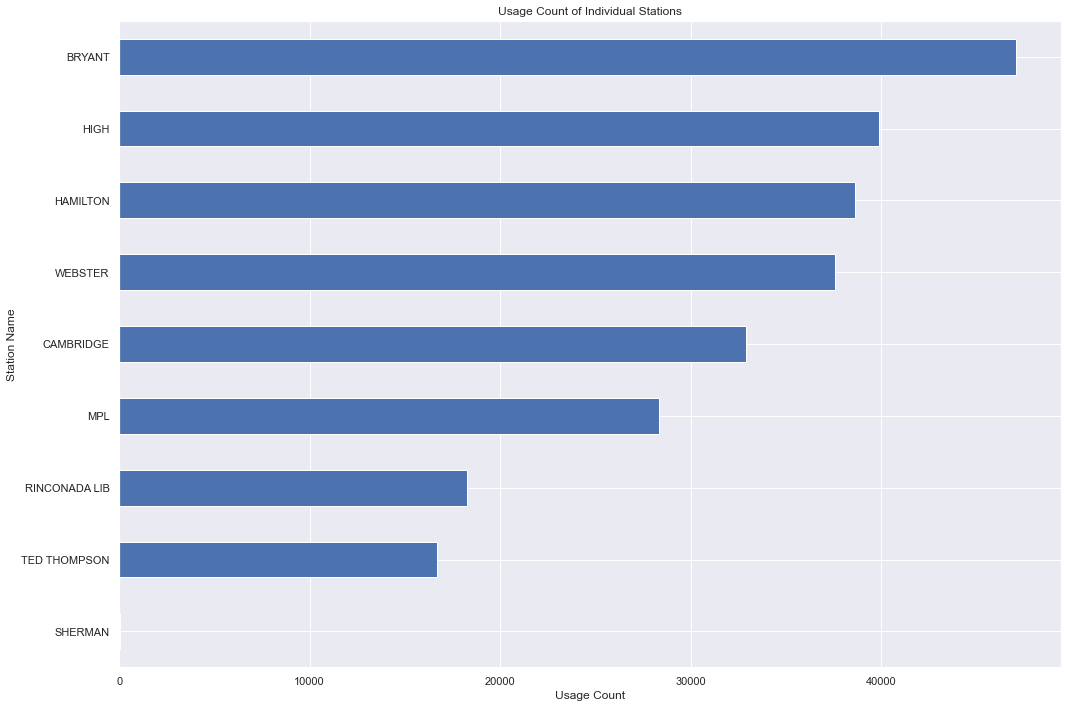

In [113]:
#occurrences of each unique station
plt.figure(figsize=(15, 10))  
df["Station Name"].value_counts().plot(kind="barh")
plt.title('Usage Count of Individual Stations')
plt.xlabel('Usage Count')
plt.ylabel('Station Name')
plt.gca().invert_yaxis()  
plt.tight_layout()  
plt.show()

Station relative location

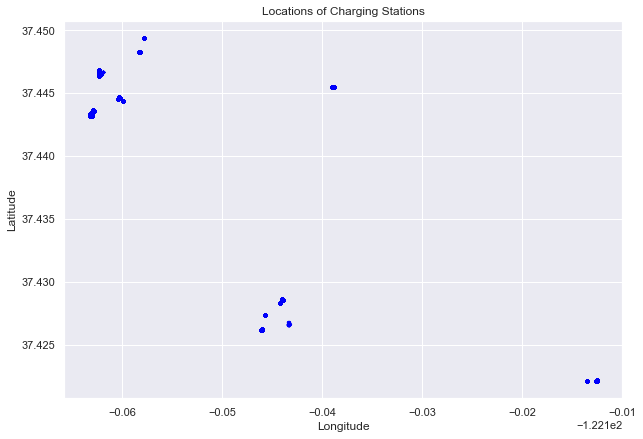

In [114]:
#GeoDataFrame from the CSV data
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))
#coordinate reference system to WGS84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, marker='o', color='blue', markersize=5)
ax.set_title('Locations of Charging Stations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

Number of uses of the top 10 users

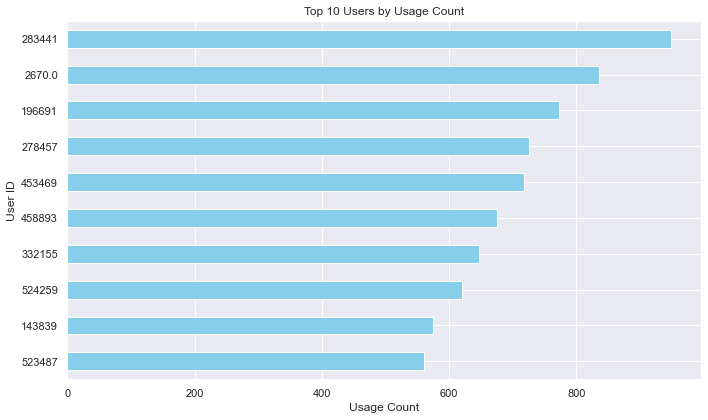

In [115]:
# Count the occurrences of each unique user
#plt.figure(figsize=(10, 6))
df['User ID'].value_counts().head(10).plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Users by Usage Count')
plt.xlabel('Usage Count')
plt.ylabel('User ID')
plt.gca().invert_yaxis()  
plt.tight_layout()  
plt.show()

total energy charged by top 10 users

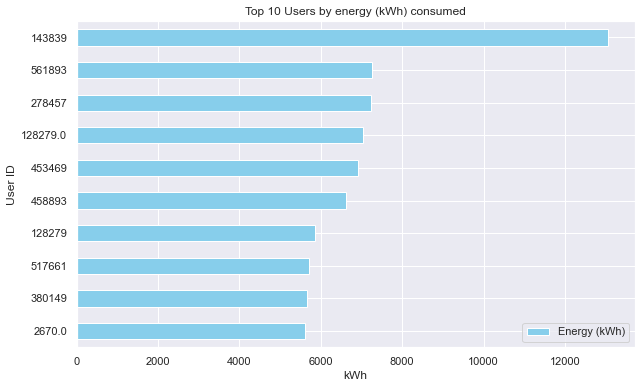

In [116]:
# Count the occurrences of each unique user
#plt.figure(figsize=(10, 6))
df[["User ID", "Energy (kWh)"]].groupby(["User ID"]).sum().sort_values(by="Energy (kWh)", ascending=False).head(10).plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Users by energy (kWh) consumed')
plt.xlabel('kWh')
plt.ylabel('User ID')
plt.gca().invert_yaxis()  
#plt.tight_layout()  
plt.show()

# distributions

In [117]:
def secondTransform(x: str) -> int:
    h, m, s = x.split(":")
    return int(h) * 3600 + int(m) * 60 + int(s)

In [118]:
df["Total Duration s"] = df["Total Duration (hh:mm:ss)"].apply(lambda x: secondTransform(x))
df["Charging Time s"] = df["Charging Time (hh:mm:ss)"].apply(lambda x: secondTransform(x))
df["Idle Time s"] = df['Total Duration s']-df["Charging Time s"]

Distribution plots for a series of useful metrics

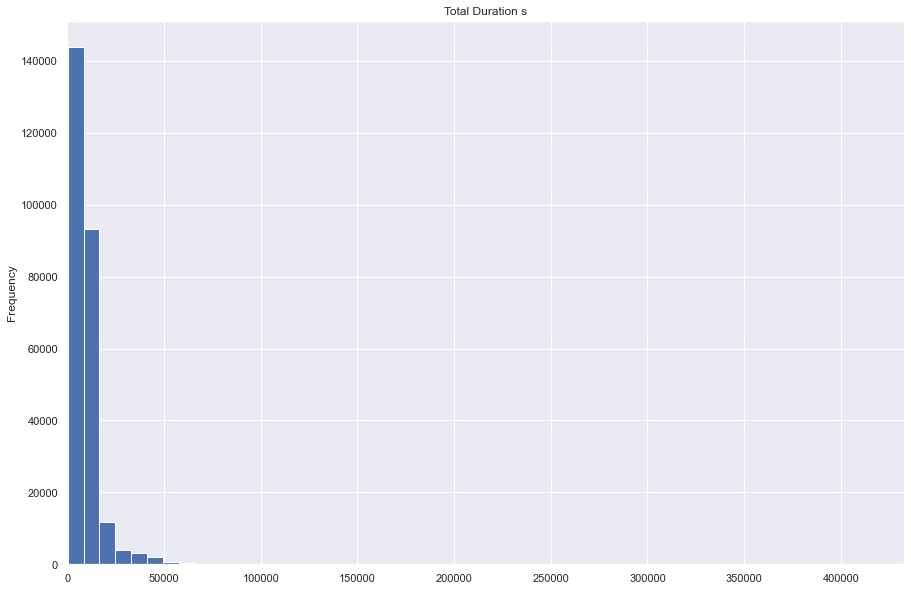

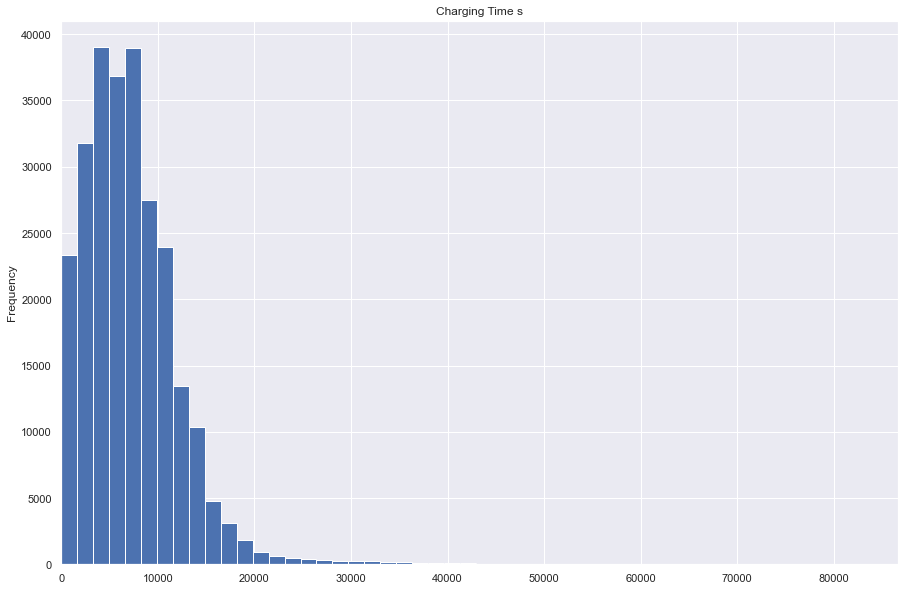

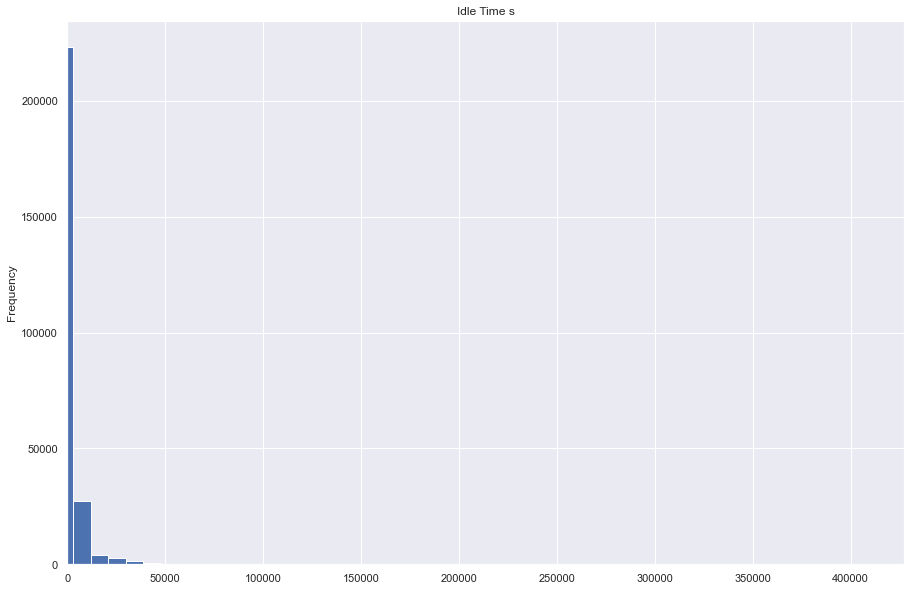

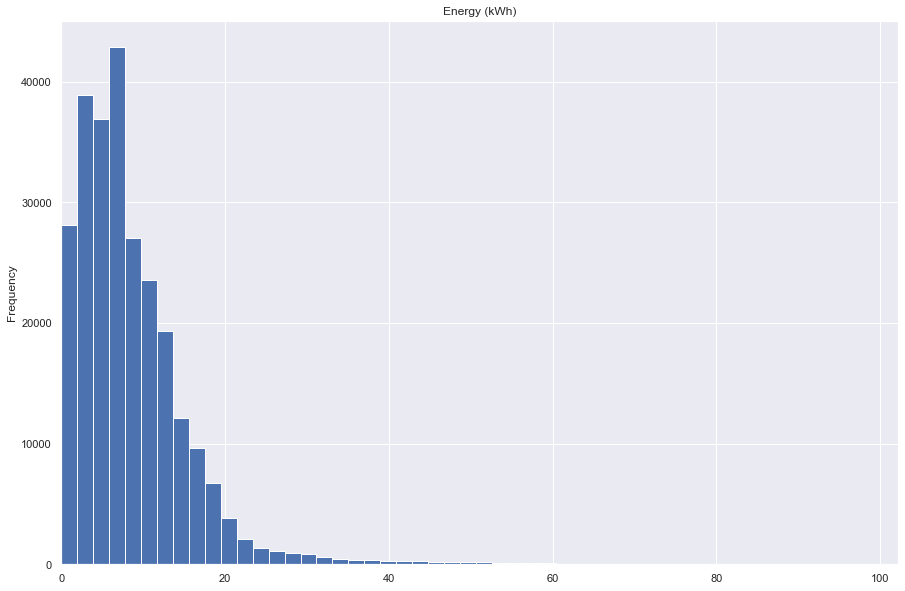

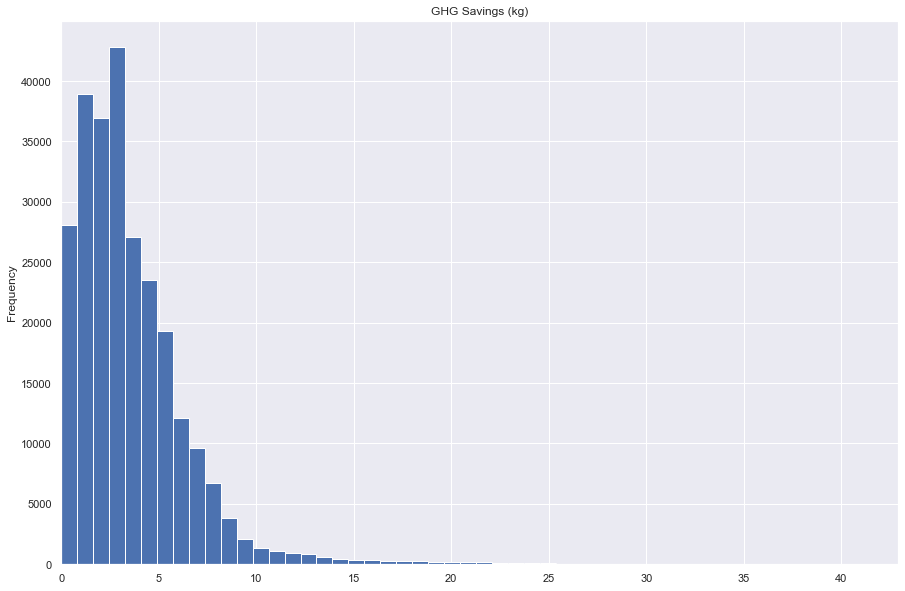

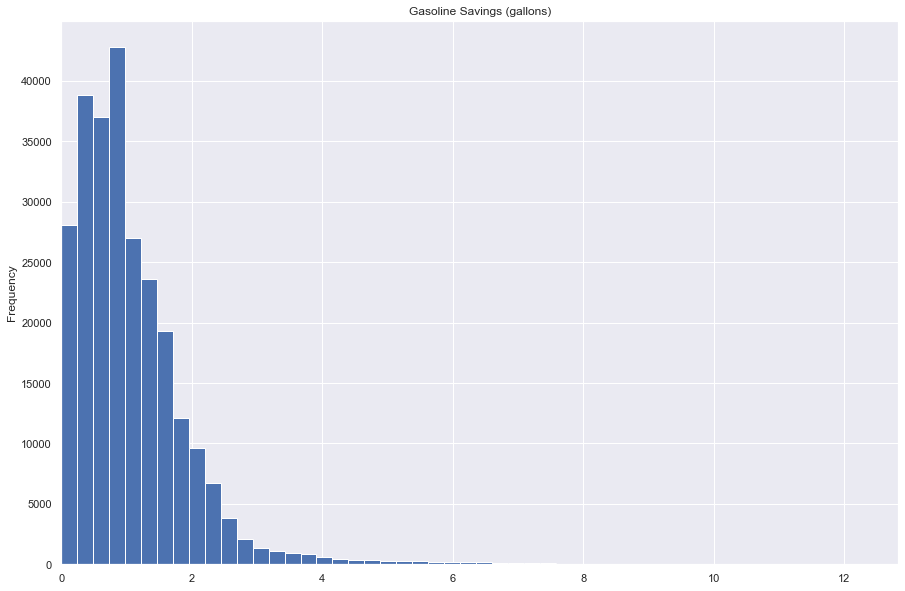

In [135]:
interesting_cols = ['Total Duration s',
       'Charging Time s','Idle Time s', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)']

for col in interesting_cols:    
    df[col].plot.hist(subplots=True, bins = 50, figsize=(15, 10))
    plt.title(col)
    plt.xlim(left=0)
    plt.show()

# Statistics by Station
sum of metrics for each station

array([<AxesSubplot: title={'center': 'Total Duration s'}, xlabel='Station Name'>,
       <AxesSubplot: title={'center': 'Charging Time s'}, xlabel='Station Name'>,
       <AxesSubplot: title={'center': 'Idle Time s'}, xlabel='Station Name'>,
       <AxesSubplot: title={'center': 'Energy (kWh)'}, xlabel='Station Name'>,
       <AxesSubplot: title={'center': 'GHG Savings (kg)'}, xlabel='Station Name'>,
       <AxesSubplot: title={'center': 'Gasoline Savings (gallons)'}, xlabel='Station Name'>],
      dtype=object)

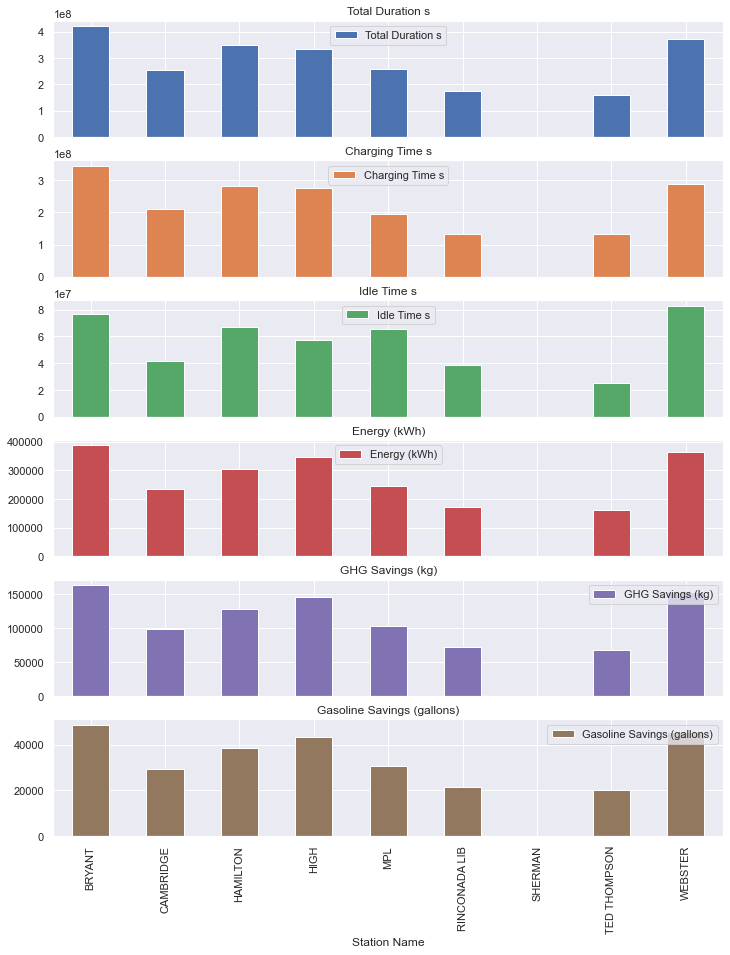

In [121]:
df[interesting_cols + ['Station Name']].groupby(["Station Name"]).sum().plot.bar(subplots=True, figsize=(12, 15))

Average of each metric for each station

array([<AxesSubplot: title={'center': 'Total Duration s'}, xlabel='Station Name'>,
       <AxesSubplot: title={'center': 'Charging Time s'}, xlabel='Station Name'>,
       <AxesSubplot: title={'center': 'Idle Time s'}, xlabel='Station Name'>,
       <AxesSubplot: title={'center': 'Energy (kWh)'}, xlabel='Station Name'>,
       <AxesSubplot: title={'center': 'GHG Savings (kg)'}, xlabel='Station Name'>,
       <AxesSubplot: title={'center': 'Gasoline Savings (gallons)'}, xlabel='Station Name'>],
      dtype=object)

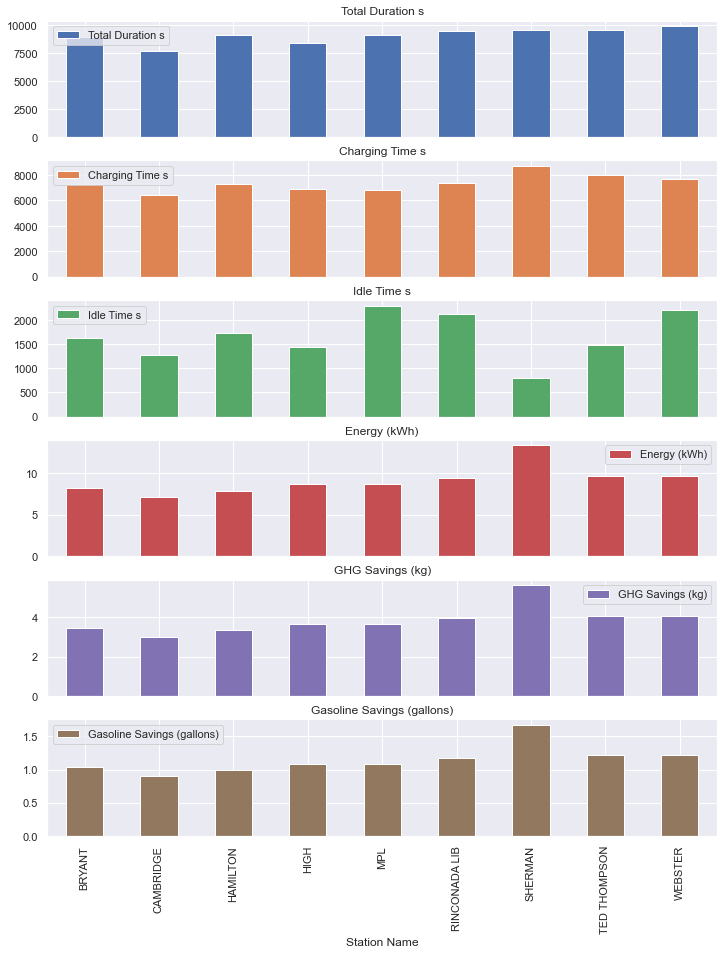

In [122]:
df[interesting_cols + ['Station Name']].groupby(["Station Name"]).mean().plot.bar(subplots=True, figsize=(12, 15))

Variance of each metric for each station

array([<AxesSubplot: title={'center': 'Total Duration s'}, xlabel='Station Name'>,
       <AxesSubplot: title={'center': 'Charging Time s'}, xlabel='Station Name'>,
       <AxesSubplot: title={'center': 'Idle Time s'}, xlabel='Station Name'>,
       <AxesSubplot: title={'center': 'Energy (kWh)'}, xlabel='Station Name'>,
       <AxesSubplot: title={'center': 'GHG Savings (kg)'}, xlabel='Station Name'>,
       <AxesSubplot: title={'center': 'Gasoline Savings (gallons)'}, xlabel='Station Name'>],
      dtype=object)

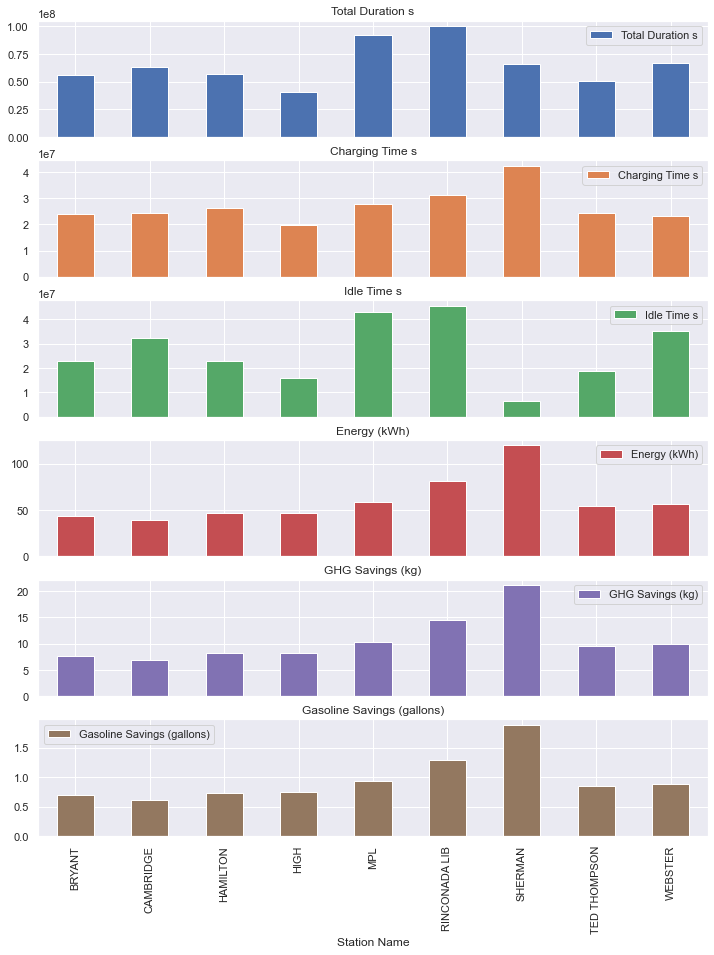

In [123]:
df[interesting_cols + ['Station Name']].groupby(["Station Name"]).var().plot.bar(subplots=True, figsize=(12, 15))

# statistics by year
sum total of each metric per year

array([<AxesSubplot: title={'center': 'Total Duration s'}, xlabel='Start Year'>,
       <AxesSubplot: title={'center': 'Charging Time s'}, xlabel='Start Year'>,
       <AxesSubplot: title={'center': 'Idle Time s'}, xlabel='Start Year'>,
       <AxesSubplot: title={'center': 'Energy (kWh)'}, xlabel='Start Year'>,
       <AxesSubplot: title={'center': 'GHG Savings (kg)'}, xlabel='Start Year'>,
       <AxesSubplot: title={'center': 'Gasoline Savings (gallons)'}, xlabel='Start Year'>],
      dtype=object)

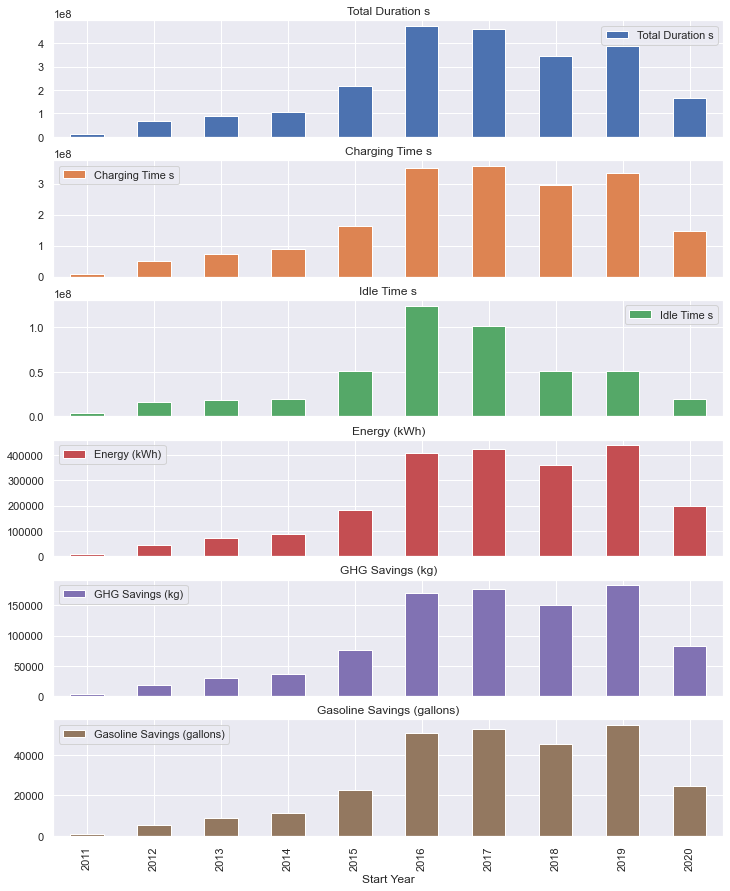

In [124]:
df[interesting_cols + ['Start Year']].groupby(["Start Year"]).sum().plot.bar(subplots=True, figsize=(12, 15))

Averages of each metric per year

array([<AxesSubplot: title={'center': 'Total Duration s'}, xlabel='Start Year'>,
       <AxesSubplot: title={'center': 'Charging Time s'}, xlabel='Start Year'>,
       <AxesSubplot: title={'center': 'Idle Time s'}, xlabel='Start Year'>,
       <AxesSubplot: title={'center': 'Energy (kWh)'}, xlabel='Start Year'>,
       <AxesSubplot: title={'center': 'GHG Savings (kg)'}, xlabel='Start Year'>,
       <AxesSubplot: title={'center': 'Gasoline Savings (gallons)'}, xlabel='Start Year'>],
      dtype=object)

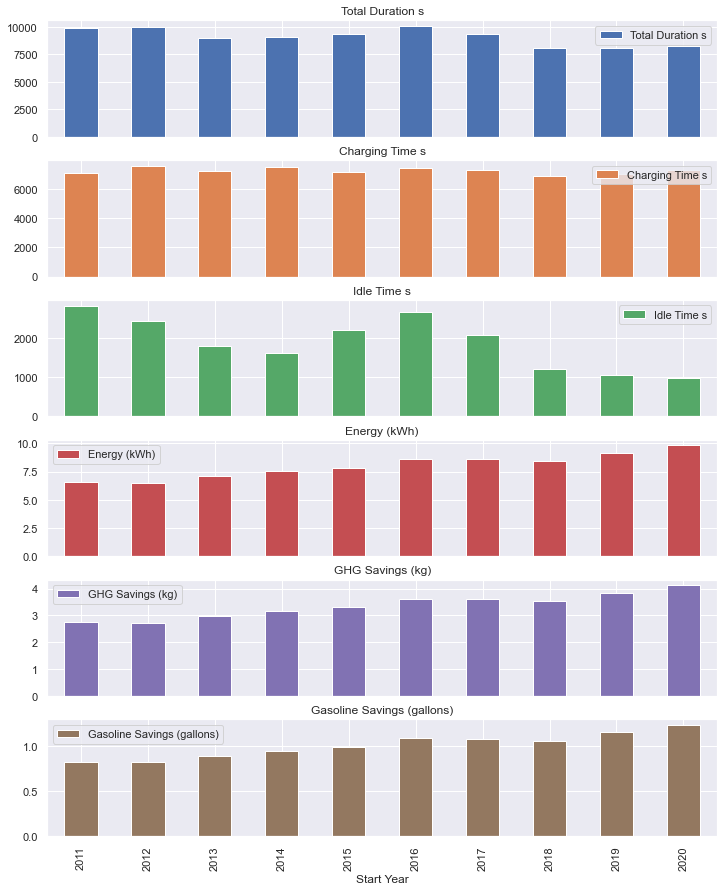

In [125]:
df[interesting_cols + ['Start Year']].groupby(["Start Year"]).mean().plot.bar(subplots=True, figsize=(12, 15))

Variances of each metric for each year

array([<AxesSubplot: title={'center': 'Total Duration s'}, xlabel='Start Year'>,
       <AxesSubplot: title={'center': 'Charging Time s'}, xlabel='Start Year'>,
       <AxesSubplot: title={'center': 'Idle Time s'}, xlabel='Start Year'>,
       <AxesSubplot: title={'center': 'Energy (kWh)'}, xlabel='Start Year'>,
       <AxesSubplot: title={'center': 'GHG Savings (kg)'}, xlabel='Start Year'>,
       <AxesSubplot: title={'center': 'Gasoline Savings (gallons)'}, xlabel='Start Year'>],
      dtype=object)

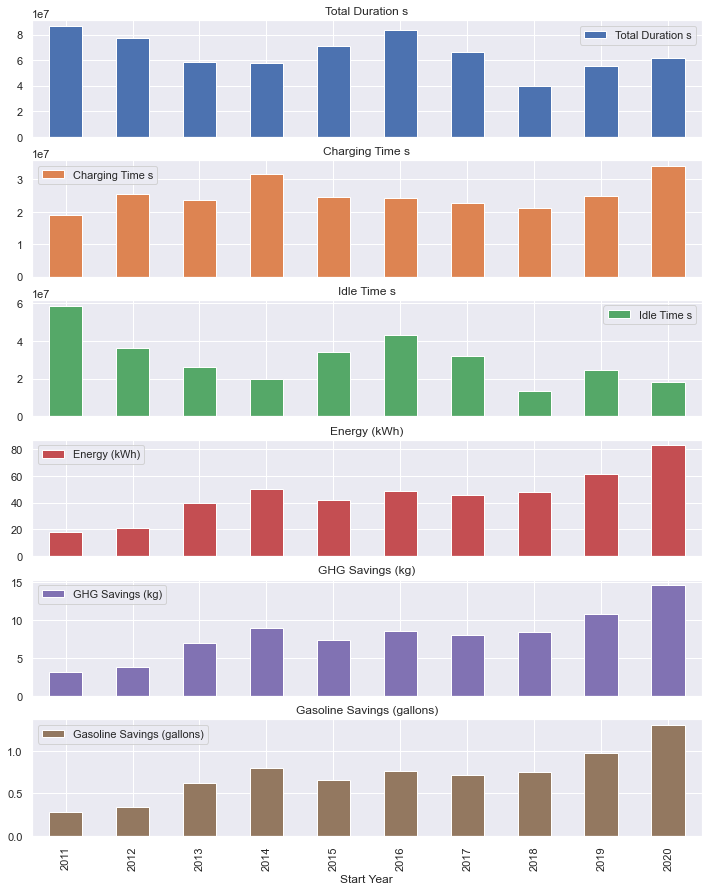

In [126]:
df[interesting_cols + ['Start Year']].groupby(["Start Year"]).var().plot.bar(subplots=True, figsize=(12, 15))

# correlation matrices
correlation matrix for selected interesting metrics

<AxesSubplot: >

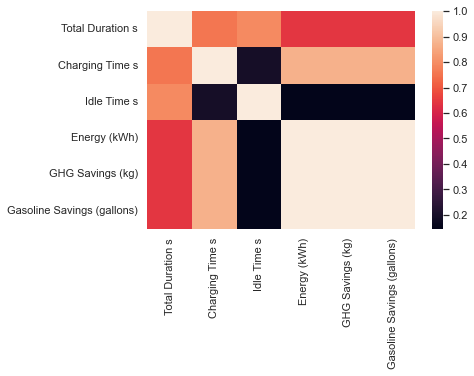

In [131]:
sns.heatmap(df[interesting_cols].corr())

Correlation matrix for all variables in the dataset

C:\Users\pgsva\AppData\Local\Temp\ipykernel_24744\942819326.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax=ax)


<AxesSubplot: >

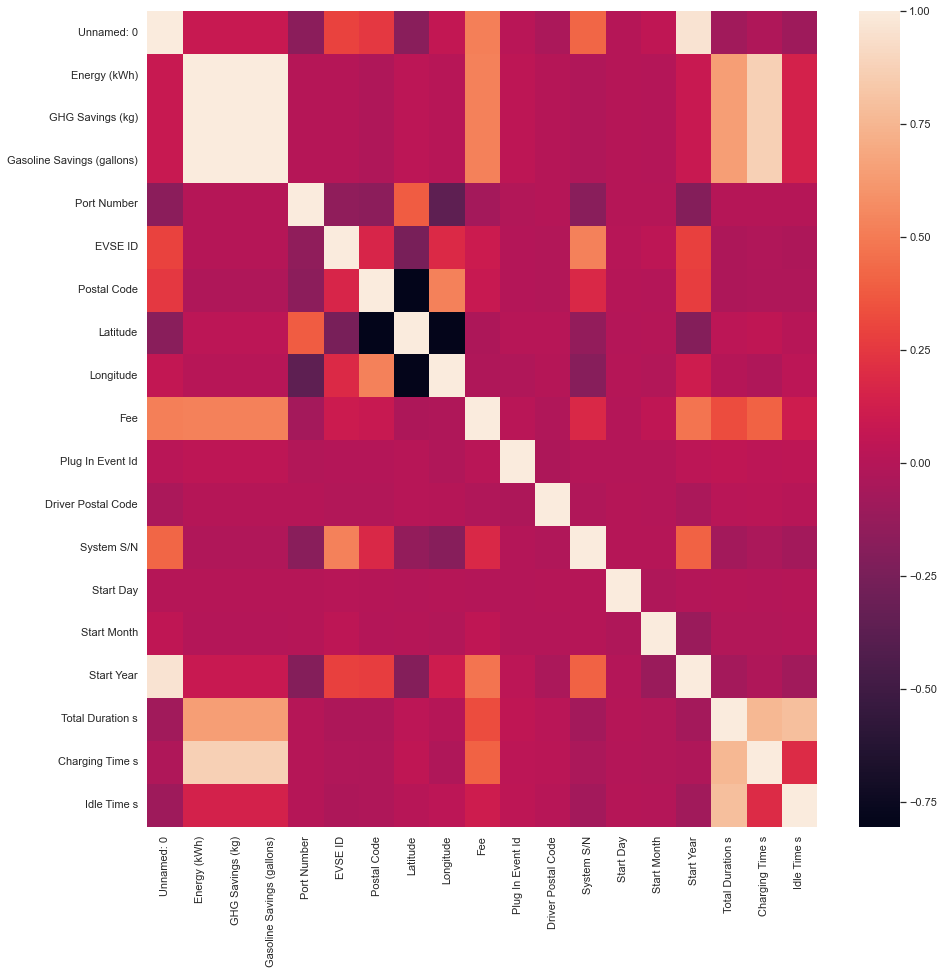

In [130]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), ax=ax)